In [2]:
import requests
import pandas as pd
import numpy as np
import datetime
from datetime import date, timedelta

import matplotlib.pyplot as plt

TODO:
- get daily air temperature data from 18 March 2016 - 6 July 2017
- get daily rainfall from 18 March 2016 - 6 July 2017
- get hourly air temperature data from 18 March 2016 - 6 July 2017   - 9am - 7pm
- get hourly rainfall from 18 March 2016 - 6 July 2017



- {'latitude': 1.3678, 'longitude': 103.9826}

2016-04-01 - 11:40
2016-05-11 - 09:00
2016-05-31 - 12:00
2016-06-13 - 12:00
2016-06-27

In [ ]:
# Get daily temperature

In [27]:
payload = {'date_time': '2017-03-18T08:00:00'}
headers = {'api-key': 'MKBJAEgyCxcTAqVIyh8HAYUIR6MG6sn7'}
r = requests.get('https://api.data.gov.sg/v1/environment/air-temperature', params=payload, headers=headers)

In [191]:
def request_result_for(metric, datetime):
    payload = {'date_time': datetime}
    headers = {'api-key': 'MKBJAEgyCxcTAqVIyh8HAYUIR6MG6sn7'}
    r = requests.get('https://api.data.gov.sg/v1/environment/' + metric, params=payload, headers=headers)
    return r.json()

In [192]:
get_temperature_for_station(request_result_for('air-temperature', '2017-03-18T09:00:00'), 'S24')

27.8

In [193]:
def get_temperature_for_station(results, station_id):
    result = [x for x in results['items'][0]['readings'] if x['station_id'] == station_id]
    return result[0]['value']

In [194]:
get_temperature_for_station(request_result_for('air-temperature', '2017-03-18T09:00:00'), 'S24')

27.8

In [64]:
def parse_date(date_string):
    date_array = date_string.split('-')
    date_array_in_int = [int(x) for x in date_array]
    return date(date_array_in_int[0], date_array_in_int[1], date_array_in_int[2])


In [73]:
def calculate_date_range(start_date, end_date):
    start_date = parse_date(start_date)
    end_date = parse_date(end_date)
    delta = end_date - start_date
    return delta

In [202]:
def build_dataframe_for(metric, start_date, end_date, station_id):
    date_range = calculate_date_range(start_date, end_date)
    start_date = parse_date(start_date)
    temperature_list = []
    date_list = []
    time_list = []
    df = pd.DataFrame()

    for i in range(date_range.days + 1):
        date_to_get = start_date + timedelta(days=i)
        date_to_get_string_format = date_to_get.strftime('%Y-%m-%d')
        for j in range(9, 20, 1):
            time_to_get = datetime.time(j)
            time_to_get_string_format = time_to_get.strftime('%H:%M:%S')
            datetime_param = date_to_get_string_format + 'T' + time_to_get_string_format
            date_list.append(date_to_get)
            time_list.append(time_to_get)
            try:
                temp = get_temperature_for_station(request_result_for(metric, datetime_param), station_id)
                temperature_list.append(temp)
            except:
                
                temperature_list.append(np.nan)
    
    df[metric] = pd.Series(temperature_list)
    df['date'] = pd.Series(date_list)
    df['time'] = pd.Series(time_list)
    
    return df

In [175]:
temperature_datetime_df = build_dataframe_for('air-temperature', '2017-06-18', '2017-07-06', 'S24')

In [176]:
temperature_datetime_df

,temperature,date,time
0,29.4,2017-06-18,09:00:00
1,27.1,2017-06-18,10:00:00
2,28.9,2017-06-18,11:00:00
3,25.1,2017-06-18,12:00:00
4,25.7,2017-06-18,13:00:00
5,27.8,2017-06-18,14:00:00
6,29.1,2017-06-18,15:00:00
7,30.4,2017-06-18,16:00:00
8,29.6,2017-06-18,17:00:00
9,26.7,2017-06-18,18:00:00


In [183]:
temperature_df.to_csv('./data/hourly-temperature-2016-03-18-to-2017-07-06.csv')

In [203]:
rainfall_datetime_df = build_dataframe_for('rainfall', '2016-03-18', '2017-07-06', 'S24')

In [204]:
rainfall_datetime_df.to_csv('./data/hourly-rainfall-2016-03-18-to-2017-07-06.csv')

### Data visualisation

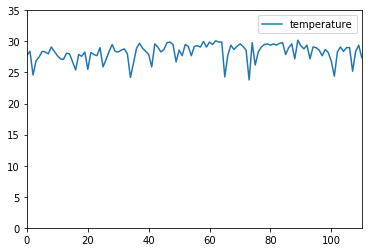

In [148]:
temperature_df[['temperature']].plot(ylim=(0,35))
plt.show()

In [ ]:
# Download daily rainfall data from weather.gov

In [4]:
df_rainfall = pd.read_csv('http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_201603.csv')

In [19]:
list_of_dataframes = []

# Get data for 2016
for i in range(3, 13, 1):
    temp_df = pd.read_csv('http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_2016' + "{0:0=2d}".format(i) + '.csv')
    list_of_dataframes.append(temp_df)

In [20]:
for i in range(1, 7, 1):
    temp_df = pd.read_csv('http://www.weather.gov.sg/files/dailydata/DAILYDATA_S24_2017' + "{0:0=2d}".format(i) + '.csv')
    list_of_dataframes.append(temp_df)

In [44]:
final_df = pd.concat(list_of_dataframes)
final_df

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (�C),Maximum Temperature (�C),Minimum Temperature (�C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Changi,2016,3,1,0.0,0,0,0,28.6,31.9,26.1,13.7,42.5
1,Changi,2016,3,2,0.0,0,0,0,28.2,31.2,26.4,14,44.6
2,Changi,2016,3,3,0.0,0,0,0,28.5,32.0,26.8,13.3,40.3
3,Changi,2016,3,4,0.4,0.2,0.4,0.4,28.4,31.6,26.5,12.6,37.4
4,Changi,2016,3,5,0.0,0,0,0,28.6,32.2,26.2,11.5,35.3
5,Changi,2016,3,6,0.0,0,0,0,29.0,32.7,26.9,13,31.7
6,Changi,2016,3,7,0.0,0,0,0,28.5,32.6,26.6,11.9,34.9
7,Changi,2016,3,8,0.6,0.6,0.6,0.6,28.4,32.4,26.7,8.3,23.8
8,Changi,2016,3,9,0.0,0,0,0,29.2,33.2,26.8,11.9,27
9,Changi,2016,3,10,1.6,1,1.2,1.4,29.0,33.4,26.8,9,26.6


In [23]:
final_df.to_csv('./data/daily-rainfall-2016-03-18-to-2017-07-06.csv')

In [57]:
final_df['date_combined'] = '{}-{}-{}'.format(final_df['Year'], final_df['Month'], final_df['Day'])

In [58]:
final_df['date_combined']

0     0     2016\n1     2016\n2     2016\n3     2016...
1     0     2016\n1     2016\n2     2016\n3     2016...
2     0     2016\n1     2016\n2     2016\n3     2016...
3     0     2016\n1     2016\n2     2016\n3     2016...
4     0     2016\n1     2016\n2     2016\n3     2016...
5     0     2016\n1     2016\n2     2016\n3     2016...
6     0     2016\n1     2016\n2     2016\n3     2016...
7     0     2016\n1     2016\n2     2016\n3     2016...
8     0     2016\n1     2016\n2     2016\n3     2016...
9     0     2016\n1     2016\n2     2016\n3     2016...
10    0     2016\n1     2016\n2     2016\n3     2016...
11    0     2016\n1     2016\n2     2016\n3     2016...
12    0     2016\n1     2016\n2     2016\n3     2016...
13    0     2016\n1     2016\n2     2016\n3     2016...
14    0     2016\n1     2016\n2     2016\n3     2016...
15    0     2016\n1     2016\n2     2016\n3     2016...
16    0     2016\n1     2016\n2     2016\n3     2016...
17    0     2016\n1     2016\n2     2016\n3     

In [41]:
grouped = final_df.groupby(pd.TimeGrouper("Month"))

ValueError: Invalid frequency: Month

In [36]:
grouped_df = final_df.groupby(['Month']).sum()

In [37]:
grouped_df.head()

,Year,Day,Daily Rainfall Total (mm),Mean Temperature (�C),Maximum Temperature (�C),Minimum Temperature (�C)
Month,,,,,,
1,62527,496,197.8,835.2,952.3,764.9
2,56476,406,159.2,753.8,860.1,692.9
3,125023,992,142.8,1746.8,1990.2,1595.3
4,120990,930,300.2,1716.8,1954.6,1549.6
5,125023,992,385.2,1790.5,1994.7,1626.2
